# 1. Importing libraries  

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [18]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 2 Defining path and Import Data

In [19]:
# Path and Setup
path = r'/Users/carlo/documents/03_08_22_project_6/'

In [20]:
# Importing dataset

# importing rent data
df_immo2 = pd.read_csv(os.path.join(path, 'data', 'Modified Data', 'immo_cleaned.csv'), index_col = False)

# 3. Exploring Data Set

In [21]:
df_immo2.shape

(69664, 20)

In [22]:
df_immo2.head()

,Unnamed: 0,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,livingSpace,condition,lift,baseRentRange,typeOfFlat,noRooms,noRoomsRange,regio2,numberOfYear,Pricepm2,additioncost
0,0,Nordrhein_Westfalen,245.0,central_heating,False,False,840.0,1965.0,False,86.0,well_kept,False,4,ground_floor,4.0,4,Dortmund,57.0,6.918605,245.0
1,2,Sachsen,255.0,floor_heating,True,True,1300.0,2019.0,False,83.8,first_time_use,True,6,apartment,3.0,3,Dresden,3.0,11.515513,335.0
2,6,Sachsen,70.0,self_contained_central_heating,False,False,380.0,1958.0,False,62.0,fully_renovated,False,2,apartment,2.0,2,Mittelsachsen_Kreis,64.0,5.000000,70.0
3,10,Sachsen,88.0,central_heating,False,True,307.0,1930.0,False,40.2,Other,False,1,apartment,2.0,2,Chemnitz,92.0,5.447761,88.0
4,11,Sachsen,155.0,central_heating,False,False,555.0,1892.0,False,80.0,well_kept,False,2,apartment,3.0,3,Mittelsachsen_Kreis,130.0,5.000000,155.0


In [23]:
# remove columns which have object types and have nothing to do with the calculation
df_immo2_colremoved = df_immo2.drop(columns = ["regio1", "heatingType", "condition", "typeOfFlat", "regio2", "balcony",
                                              "hasKitchen", "newlyConst","lift"])

In [24]:
# remove Unnamed Columns
df_immo2_colremoved.drop("Unnamed: 0", axis=1)

,serviceCharge,totalRent,yearConstructed,livingSpace,baseRentRange,noRooms,noRoomsRange,numberOfYear,Pricepm2,additioncost
0,245.00,840.00,1965.0,86.00,4,4.0,4,57.0,6.918605,245.00
1,255.00,1300.00,2019.0,83.80,6,3.0,3,3.0,11.515513,335.00
2,70.00,380.00,1958.0,62.00,2,2.0,2,64.0,5.000000,70.00
3,88.00,307.00,1930.0,40.20,1,2.0,2,92.0,5.447761,88.00
4,155.00,555.00,1892.0,80.00,2,3.0,3,130.0,5.000000,155.00
...,...,...,...,...,...,...,...,...,...,...
69659,112.13,1479.64,2016.0,89.67,7,3.0,3,6.0,14.000000,224.26
69660,98.00,424.52,1994.0,57.08,2,2.5,2,28.0,5.299930,122.00
69661,140.00,440.00,1961.0,59.89,1,2.0,2,61.0,5.009184,140.00
69662,120.00,368.00,1930.0,55.00,1,2.0,2,92.0,4.509091,120.00


In [25]:
df_immo2_colremoved.head()

,Unnamed: 0,serviceCharge,totalRent,yearConstructed,livingSpace,baseRentRange,noRooms,noRoomsRange,numberOfYear,Pricepm2,additioncost
0,0,245.0,840.0,1965.0,86.0,4,4.0,4,57.0,6.918605,245.0
1,2,255.0,1300.0,2019.0,83.8,6,3.0,3,3.0,11.515513,335.0
2,6,70.0,380.0,1958.0,62.0,2,2.0,2,64.0,5.000000,70.0
3,10,88.0,307.0,1930.0,40.2,1,2.0,2,92.0,5.447761,88.0
4,11,155.0,555.0,1892.0,80.0,2,3.0,3,130.0,5.000000,155.0


In [26]:
df_immo2_cleaned2 = df_immo2_colremoved[df_immo2_colremoved['serviceCharge'].notna()]

In [27]:
df_immo2_cleaned2.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [28]:
df_immo2_cleaned2.fillna(999, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [29]:
df_immo2_cleaned2.isnull().sum()

Unnamed: 0         0
serviceCharge      0
totalRent          0
yearConstructed    0
livingSpace        0
baseRentRange      0
noRooms            0
noRoomsRange       0
numberOfYear       0
Pricepm2           0
additioncost       0
dtype: int64

In [30]:
df_immo2_cleaned2.isna().sum()

Unnamed: 0         0
serviceCharge      0
totalRent          0
yearConstructed    0
livingSpace        0
baseRentRange      0
noRooms            0
noRoomsRange       0
numberOfYear       0
Pricepm2           0
additioncost       0
dtype: int64

# 4. Clustering: Elbow technique

In [31]:
num_cl = range(1, 20) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [32]:
score = [kmeans[i].fit(df_immo2_cleaned2).score(df_immo2_cleaned2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-418037594893691.9,
 -104142707474834.75,
 -46619118855815.945,
 -26001586356066.082,
 -16691905103860.447,
 -11602632624430.334,
 -8573152828067.204,
 -6544923120464.097,
 -5165235994743.3,
 -4182764223096.8086,
 -3470699663349.3823,
 -2936475911812.3384,
 -2483013288333.7617,
 -2152392016263.2502,
 -1866798715367.1782,
 -1642135292438.7944,
 -1468548305703.6597,
 -1309663764933.174,
 -1172046728927.1943]

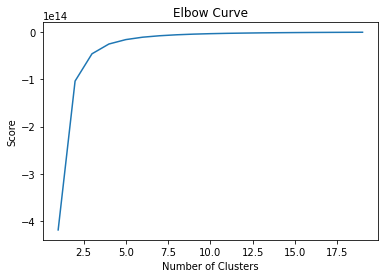

In [33]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# the optimal count of clusters is betwenn 2.5 and 4. After that there is little improvement

In [34]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [35]:
# Fit the k-means object to the data.

kmeans.fit(df_immo2_cleaned2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [36]:
df_immo2_cleaned2['clusters'] = kmeans.fit_predict(df_immo2_cleaned2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\carlo\AppData\Local\Temp/ipykernel_4880/3889944889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_immo2_cleaned2['clusters'] = kmeans.fit_predict(df_immo2_cleaned2)


In [37]:
df_immo2_cleaned2.head()

,Unnamed: 0,serviceCharge,totalRent,yearConstructed,livingSpace,baseRentRange,noRooms,noRoomsRange,numberOfYear,Pricepm2,additioncost,clusters
0,0,245.0,840.0,1965.0,86.0,4,4.0,4,57.0,6.918605,245.0,2
1,2,255.0,1300.0,2019.0,83.8,6,3.0,3,3.0,11.515513,335.0,2
2,6,70.0,380.0,1958.0,62.0,2,2.0,2,64.0,5.000000,70.0,2
3,10,88.0,307.0,1930.0,40.2,1,2.0,2,92.0,5.447761,88.0,2
4,11,155.0,555.0,1892.0,80.0,2,3.0,3,130.0,5.000000,155.0,2


In [38]:
df_immo2_cleaned2['clusters'].value_counts()

2    23121
0    23065
1    23002
Name: clusters, dtype: int64

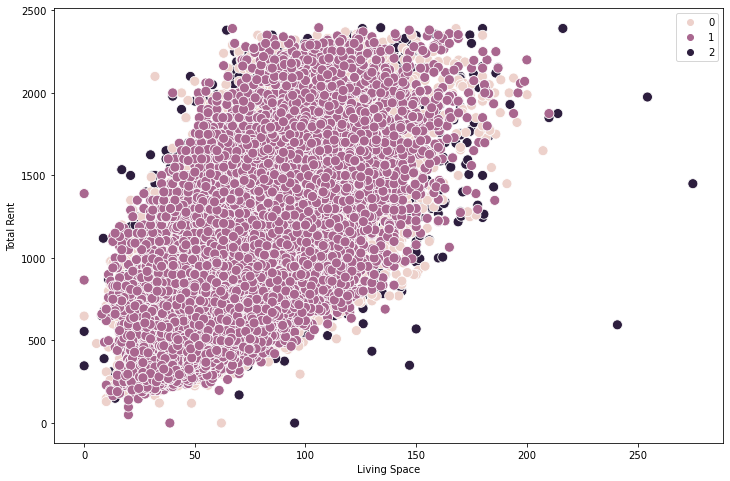

In [39]:
# Plot the clusters for the "Living Space" and "Rent Value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_immo2_cleaned2['livingSpace'], y=df_immo2_cleaned2['totalRent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Living Space') # Label x-axis.
plt.ylabel('Total Rent') # Label y-axis.
plt.show()

# The general idea is: when the living space is big, the rent value will also be higher. There are only few points to lead about, when the living space is bigger, the rent is lower. It also points out that some rent values, despite the living space is small, the value is higher. This probrably have another factors to take into account.

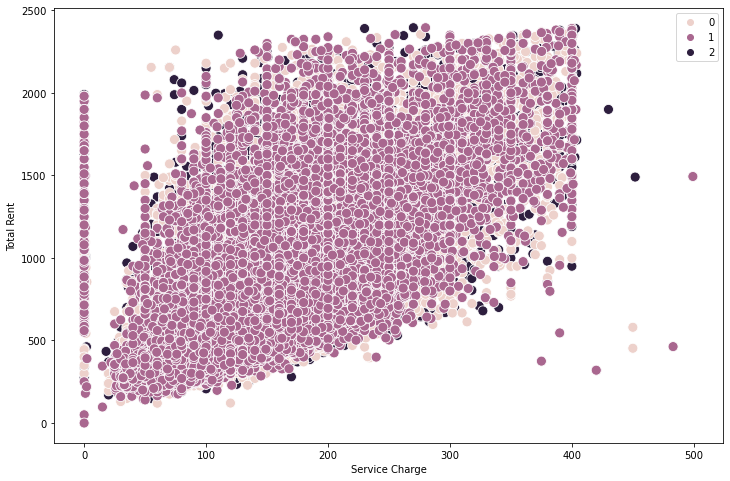

In [40]:
# Plot the clusters for the "Service Charge" and "Total Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_immo2_cleaned2['serviceCharge'], y=df_immo2_cleaned2['totalRent'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Service Charge') 
plt.ylabel('Total Rent') 
plt.show()

# Regarding the service charge: Service charge is the cost of the following: heating + water services + electricity services. There is no costs of HOE (costs including in building mainteinance, or community mainteinance)It is not possible to know if the share ammount of every service which makes part of the service charge. It is only possible to know that heating costs trend to be higher than any other services. This graph shows that service charge has not to do with rental costs. This due to the fact that some buildings have older heating equipment and for sure they have higher service charge costs. In fact, needs to look into more detail in the data if older equipment plays a role in this trend or not. 

In [41]:
df_immo2_cleaned2.loc[df_immo2_cleaned2['clusters'] == 2, 'cluster'] = 'dark purple'
df_immo2_cleaned2.loc[df_immo2_cleaned2['clusters'] == 1, 'cluster'] = 'purple'
df_immo2_cleaned2.loc[df_immo2_cleaned2['clusters'] == 0, 'cluster'] = 'pink'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [42]:
df_immo2_cleaned2.groupby('cluster').agg({'serviceCharge':['mean', 'median'], 
                         'totalRent':['mean', 'median'], 
                         'livingSpace':['mean', 'median']})

serviceCharge          totalRent        livingSpace       
                     mean median        mean median        mean median
cluster                                                               
dark purple    141.716736  130.0  739.814305  580.0   66.615838  62.62
pink           143.531109  130.0  754.486356  596.0   66.848408  63.00
purple         144.312080  130.0  767.962452  609.2   67.218018  63.20